# using model based forecastingmethod for building a model to predict the sales of plastics
***creating different models in it and chossing the best model as final model.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [3]:
plasticsales=pd.read_csv("PlasticSales (1).csv")

In [5]:
plasticsales.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


In [4]:
plasticsales.head(12)

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [15]:
plasticsales['Month'][0]
H=plasticsales['Month'][0]
H
H[0:3]

'Jan'

In [16]:
plasticsales['month']=0

In [18]:
for i in range(60):
    h=plasticsales['Month'][i]
    plasticsales['month'][i]=h[0:3]

<ipython-input-18-95fa7581523b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plasticsales['month'][i]=h[0:3]
C:\Users\Anup w\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
dummy= pd.DataFrame(pd.get_dummies(plasticsales['month']))

In [20]:
plastic=pd.concat((plasticsales,dummy),axis=1)

In [21]:
plastic.head(12)

,Month,Sales,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun-49,1107,Jun,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul-49,1165,Jul,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug-49,1216,Aug,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep-49,1208,Sep,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct-49,1131,Oct,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
t=np.arange(1,61)
plastic['t']=t
t_square=plastic['t']*plastic['t']
plastic['t_square']=t_square

In [23]:
log_Sales=np.log(plastic['Sales'])

plastic['log_Sales']=log_Sales

In [24]:
plastic.head(12)

,Month,Sales,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314
5,Jun-49,1107,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36,7.009409
6,Jul-49,1165,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49,7.060476
7,Aug-49,1216,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64,7.103322
8,Sep-49,1208,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81,7.096721
9,Oct-49,1131,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100,7.030857


In [27]:
plastic["Date"] = pd.to_datetime(plastic.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

plastic["month"] = plastic.Date.dt.strftime("%b") # month extraction
plastic["year"] = plastic.Date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction 
plastic["month"]

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
12    Jan
13    Feb
14    Mar
15    Apr
16    May
17    Jun
18    Jul
19    Aug
20    Sep
21    Oct
22    Nov
23    Dec
24    Jan
25    Feb
26    Mar
27    Apr
28    May
29    Jun
30    Jul
31    Aug
32    Sep
33    Oct
34    Nov
35    Dec
36    Jan
37    Feb
38    Mar
39    Apr
40    May
41    Jun
42    Jul
43    Aug
44    Sep
45    Oct
46    Nov
47    Dec
48    Jan
49    Feb
50    Mar
51    Apr
52    May
53    Jun
54    Jul
55    Aug
56    Sep
57    Oct
58    Nov
59    Dec
Name: month, dtype: object

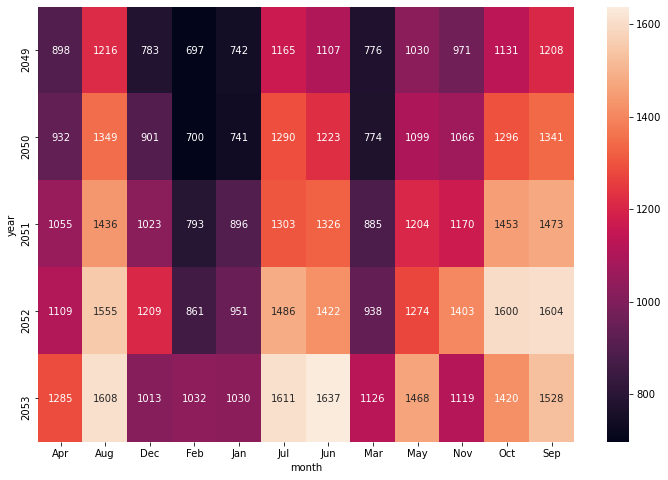

In [28]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
 

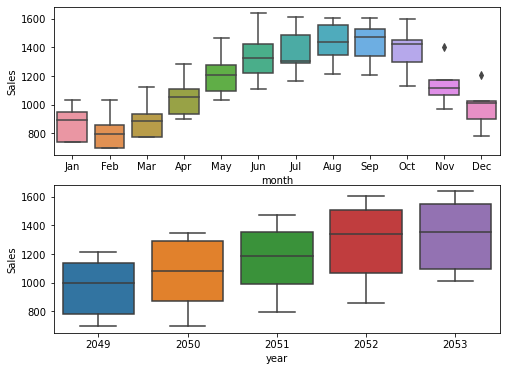

In [35]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=plastic)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=plastic)
 

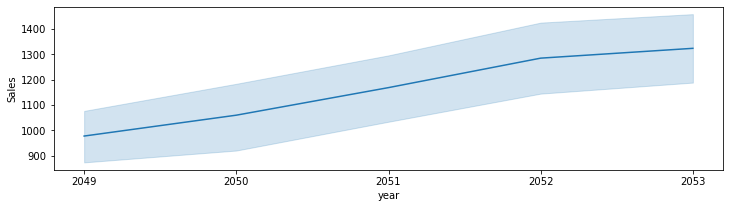

In [36]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=plastic) 

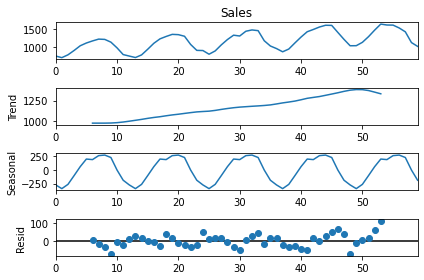

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(plastic.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

In [38]:
Train = plastic.head(147)
Test = plastic.tail(12)  

In [39]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

239.17175431351137

In [40]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 


237.507960183456

In [41]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

236.69281263092813

In [42]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

188.48213885317247

In [43]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

94.6564537794451

In [45]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

196.25420335757093

In [46]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

112.31598330643799

In [47]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
4,rmse_add_sea_quad,94.656454
6,rmse_Mult_add_sea,112.315983
3,rmse_add_sea,188.482139
5,rmse_Mult_sea,196.254203
2,rmse_Quad,236.692813
1,rmse_Exp,237.507960
0,rmse_linear,239.171754


# best model is additive seasonality quadratic model and building the final model on it,To predict the sales 

In [50]:
final_model = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [51]:
pred_new  = pd.Series(final_model.predict(predict_data)) 
pred_new  

0     1425.737091
1     1574.699059
2     1692.461028
3     1710.222996
4     1761.784965
5     1749.546933
6     1688.508902
7     1444.070870
8     1273.832839
9     1241.046109
10    1174.477347
11    1246.508585
dtype: float64

In [52]:
predict_data["forecasted_Sales"] = pd.Series(pred_new) 

In [53]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Sales
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,1425.737091
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,1574.699059
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,1692.461028
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,1710.222996
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,1761.784965
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,1749.546933
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,1688.508902
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,1444.070870
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,1273.832839
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,1241.046109
